Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(10000, 3072) (1000, 3072)
Got 296 / 1000 correct with k=5 using L2 distance => accuracy: 0.296000
Got 310 / 1000 correct with k=5 using L1 distance => accuracy: 0.310000


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

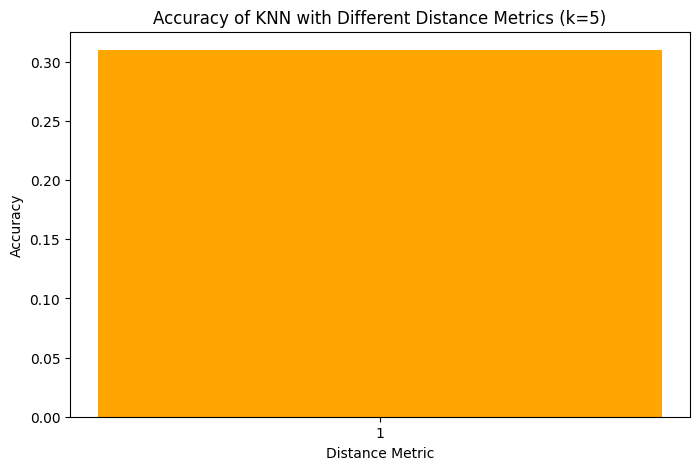

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'D:\9th semester\git\ML_Spring_23_24\Mid\assignments\KNN-HW')  # Insert the path to the directory containing data_utils.py
import data_utils
import download
from tqdm import tqdm

def download_data():
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    download_dir = "./data"
    download.maybe_download_and_extract(url, download_dir)

# Class to initialize and apply K-nearest neighbor classifier
class KNearestNeighbor(object):
    def __init__(self):
        pass

    # Method to initialize classifier with training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    # Method to predict labels of test examples using 'compute_distances' and 'predict_labels' methods.
    def predict(self, X, k=1, num_loops=0, dist_type='l2'):
        if num_loops == 0:
            dists = self.compute_distances(X, dist_type)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    # Method to compute distances from each test example to every training example
    def compute_distances(self, X, dist_type='l2'):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        # Compute distances based on the given distance type
        if dist_type == 'l2':
            # L2 distance (Euclidean)
            for i in range(num_test):
                dists[i, :] = np.sqrt(np.sum(np.square(self.X_train - X[i, :]), axis=1))
        elif dist_type == 'l1':
            # L1 distance (Manhattan)
            for i in range(num_test):
                dists[i, :] = np.sum(np.abs(self.X_train - X[i, :]), axis=1)
        else:
            raise ValueError('Invalid distance type. Available types: l1, l2')

        return dists

    # Method to predict labels of test examples using chosen value of k given distances obtained from 'compute_distances' method.
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            labels = self.y_train[np.argsort(dists[i, :])[:k]]
            closest_y = labels
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

def visualize_data(X_train, y_train):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(classes)
    samples_per_class = 7
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

if __name__ == "__main__":

    # Download CIFAR10 data and store it in the current directory if you have not done it.
    # download_data()
    cifar10_dir = r'D:\9th semester\git\ML_Spring_23_24\Mid\assignments\KNN-HW\cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Checking the size of the training and testing data
    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)

    # Visualize the data if you want
    # visualize_data(X_train, y_train)

    # Memory error prevention by subsampling data. We sample 10000 training examples and 1000 test examples.
    num_training = 10000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 1000
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Flatten the data
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))

    # Printing the shapes to verify
    print(X_train.shape, X_test.shape)  # X_train should be (10000, 3072) and X_test should be (1000, 3072)

    # KNN with L2 (Euclidean) distance
    classifier = KNearestNeighbor()
    classifier.train(X_train, y_train)
    y_test_pred_l2 = classifier.predict(X_test, k=5, dist_type='l2')
    num_correct_l2 = np.sum(y_test_pred_l2 == y_test)  # number of test examples correctly predicted
    accuracy_l2 = float(num_correct_l2) / num_test
    print('Got %d / %d correct with k=5 using L2 distance => accuracy: %f' % (num_correct_l2, num_test, accuracy_l2))

    # KNN with L1 (Manhattan) distance
    y_test_pred_l1 = classifier.predict(X_test, k=5, dist_type='l1')
    num_correct_l1 = np.sum(y_test_pred_l1 == y_test)  # number of test examples correctly predicted
    accuracy_l1 = float(num_correct_l1) / num_test
    print('Got %d / %d correct with k=5 using L1 distance => accuracy: %f' % (num_correct_l1, num_test, accuracy_l1))

    # Visualizing the accuracy for L2 (Euclidean)
    plt.figure(figsize=(8, 5))
    plt.bar(['L2 (Euclidean)'], [accuracy_l2], color='blue')
    plt.xlabel('Distance Metric')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of KNN with L2 (Euclidean) Distance (k=5)')
    plt.ylim(0, 1)
    plt.show()

    # Visualizing the accuracy for L1 (Manhattan)
    plt.figure(figsize=(8, 5))
    plt.bar(['L1 (Manhattan)'], [accuracy_l1], color='orange')
    plt.xlabel('Distance Metric')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of KNN with L1 (Manhattan) Distance (k=5)')
    plt.ylim(0, 1)
    plt.show()
